In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv(r'C:\Users\Ganesh\Desktop\Hasitha intyerim\Project_file.csv')
df1 = df.copy()
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_status
0,14350,14350,14350.0,0,19.19,9,28700.0,1,33.88,0,1,50,14,1,22515,73.1,28,0,1173.84,0.0,0.0,0.0,0,26,0,0,28699.0,30800,33,0,1,0,0
1,4800,4800,4800.0,0,10.99,0,65000.0,1,3.64,0,1,0,6,0,7624,23.2,13,1,83.95,0.0,0.0,0.0,0,9,0,0,9974.0,32900,62,0,1,0,0
2,10000,10000,10000.0,0,7.26,2,45000.0,0,18.42,0,0,0,5,0,10877,31.2,19,1,56.47,0.0,0.0,0.0,0,9,0,65,38295.0,34900,72,0,0,0,0
3,15000,15000,15000.0,0,19.72,10,105000.0,0,14.97,0,2,46,10,0,13712,55.5,21,0,4858.62,0.0,0.0,0.0,0,135,0,0,55564.0,24700,41,0,1,0,0
4,16000,16000,16000.0,0,10.64,10,52000.0,2,20.16,0,0,0,11,0,35835,76.2,27,1,2296.41,0.0,0.0,0.0,0,96,0,0,47159.0,47033,64,0,0,1,0


In [4]:
df1 = df1.drop(['funded_amnt' , 'funded_amnt_inv' ,'recoveries','revol_bal' ] , axis = 1 )

# Dropped them due to multicollinearity

In [4]:
X = df1.drop('loan_status' , axis = 1 )
y = df1.loan_status

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 10, test_size = 0.2)

Accuracy Score : - 0.7663570710817689




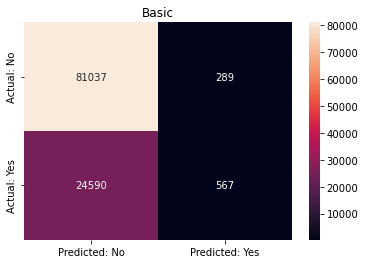



              precision    recall  f1-score   support

           0       0.77      1.00      0.87     81326
           1       0.66      0.02      0.04     25157

    accuracy                           0.77    106483
   macro avg       0.71      0.51      0.46    106483
weighted avg       0.74      0.77      0.67    106483



In [8]:
algo(LogisticRegression , X_train, X_test, y_train, y_test , 'Basic')

# Balancing the data

In [6]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 0.8 ,k_neighbors = 20, random_state = 10)   # UpSampling

X_up , y_up = sm.fit_resample(X_train , y_train )

df_up = pd.concat([X_up , y_up] , axis = 1)        # Upsampled DataFrame

df_up.loan_status.value_counts()

0    325272
1    260217
Name: loan_status, dtype: int64

Text(0.88, 270000, '260217')

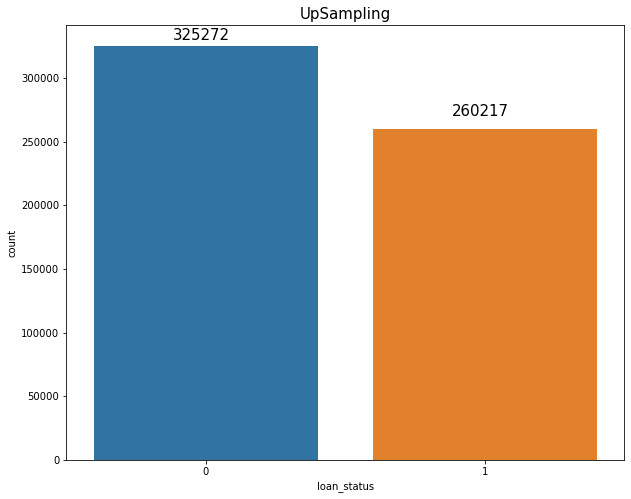

In [59]:
plt.figure(figsize = (10,8))
sns.countplot(df_up.loan_status)
plt.title('UpSampling',fontsize = 15)
plt.text(x = -0.12,y = 330000 ,s = '325272',fontsize = 15)
plt.text(x = 0.88 , y = 270000,s = '260217' , fontsize = 15)

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rm = RandomUnderSampler(sampling_strategy = 0.8 , random_state = 10)                                              # DownSampling

X_down , y_down = rm.fit_resample(X_train , y_train )

df_down = pd.concat([X_down , y_down] , axis = 1)                      # Downsampled Dataframe 

df_down.loan_status.value_counts()

0    125821
1    100657
Name: loan_status, dtype: int64

Text(0.88, 105000, '100657')

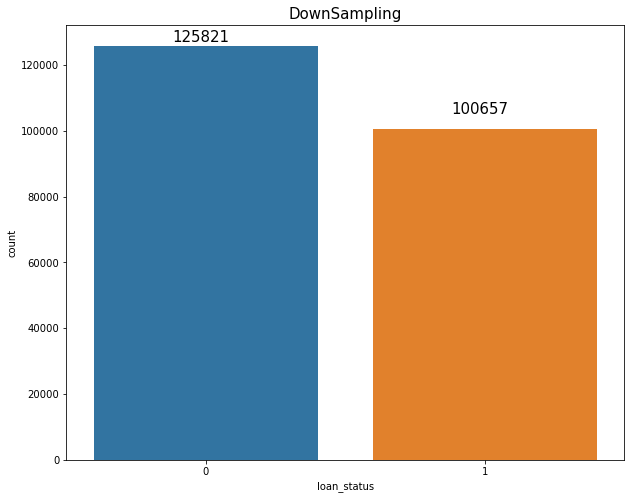

In [53]:
plt.figure(figsize = (10,8))
sns.countplot(df_down.loan_status)
plt.title('DownSampling',fontsize = 15)
plt.text(x = -0.12,y = 127000 ,s = '125821',fontsize = 15)
plt.text(x = 0.88 , y = 105000,s = '100657' , fontsize = 15)

In [10]:
df_up_1 = df_up[df_up.loan_status == 1]                    # Defaulters in upsampled dataframe


df_down_1 = df_down[df_down.loan_status == 1]                # Defaulters in Downsapled dataframe


df_up_down1 = pd.concat([df_up , df_down_1] , axis = 0)      # Add the downsampled defaulters into the upsampled dataframe
df_down_up1 = pd.concat([df_down , df_up_1] , axis = 0)    # Add the upsampled defaulters to the downsampled dataframe 

X_up_updated = df_up_down1.drop(['loan_status'] , axis = 1)
y_up_updated = df_up_down1.loan_status

X_down_updated = df_down_up1.drop(['loan_status'] , axis = 1)
y_down_updated = df_down_up1.loan_status

In [11]:
df_down_up1.loan_status.value_counts()  

1    425929
0    100657
Name: loan_status, dtype: int64

In [12]:
df_up_down1.loan_status.value_counts()

1    425929
0    325272
Name: loan_status, dtype: int64

# Model Training

In [46]:
# Function for alorithms

def algo(algorithm , X_train , X_test , y_train , y_test, title):
    
    logreg = algorithm()
    model = logreg.fit(X_train , y_train)
    
    print('Accuracy Score : -' , model.score(X_test , y_test))
    print('\n')
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

    sns.heatmap(conf_mat, annot = True, fmt = 'd')
    plt.title(title)
    plt.show()
    
    print('\n')
    print(classification_report(y_test , y_pred))

# Results after upsampling

Accuracy Score : - 0.7796174037170253




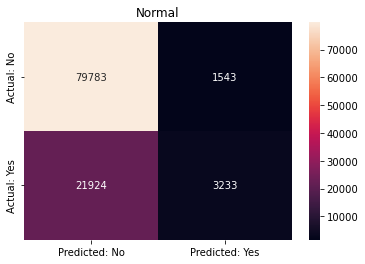



              precision    recall  f1-score   support

           0       0.78      0.98      0.87     81326
           1       0.68      0.13      0.22     25157

    accuracy                           0.78    106483
   macro avg       0.73      0.55      0.54    106483
weighted avg       0.76      0.78      0.72    106483



In [67]:
algo(LogisticRegression, X_train , X_test , y_train , y_test,'Normal')  

Accuracy Score : - 0.7043189992768799




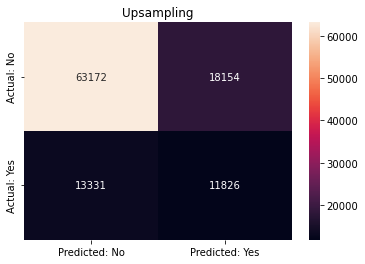



              precision    recall  f1-score   support

           0       0.83      0.78      0.80     81326
           1       0.39      0.47      0.43     25157

    accuracy                           0.70    106483
   macro avg       0.61      0.62      0.61    106483
weighted avg       0.72      0.70      0.71    106483



In [45]:
algo(LogisticRegression, X_up , X_test , y_up , y_test,'Upsampling')  

# Results after Downsampling

Accuracy Score : - 0.6965525013382418




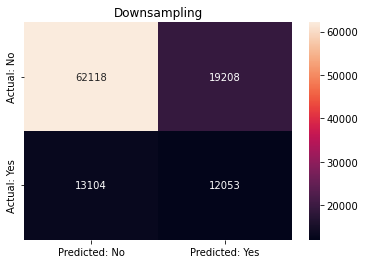



              precision    recall  f1-score   support

           0       0.83      0.76      0.79     81326
           1       0.39      0.48      0.43     25157

    accuracy                           0.70    106483
   macro avg       0.61      0.62      0.61    106483
weighted avg       0.72      0.70      0.71    106483



In [47]:
algo(LogisticRegression,X_down , X_test, y_down , y_test , 'Downsampling')

# Results after Updated sampling

In [48]:
algo(LogisticRegression,X_up_updated , X_test , y_up_updated , y_test , 'Up updated')

NameError: name 'X_up_updated' is not defined

Accuracy Score : - 0.24502502746917348




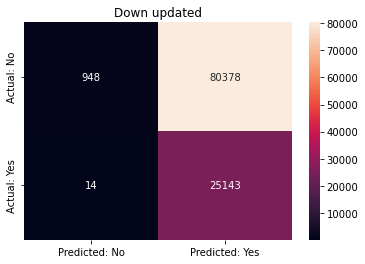



              precision    recall  f1-score   support

           0       0.99      0.01      0.02     81326
           1       0.24      1.00      0.38     25157

    accuracy                           0.25    106483
   macro avg       0.61      0.51      0.20    106483
weighted avg       0.81      0.25      0.11    106483



In [25]:
algo(LogisticRegression,X_down_updated , X_test , y_down_updated , y_test , 'Down updated')

In [ ]:
{'Upsampling' : []  ,
 'Downsampling' : , 
'Updated upsampling' :
'updated Downsapling' :}

# Decision Tree

Accuracy Score : - 0.8421532075542575




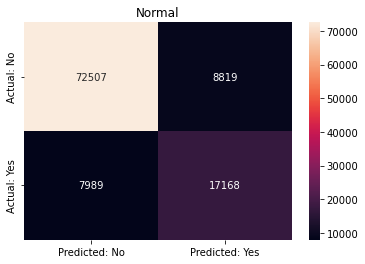



              precision    recall  f1-score   support

           0       0.90      0.89      0.90     81326
           1       0.66      0.68      0.67     25157

    accuracy                           0.84    106483
   macro avg       0.78      0.79      0.78    106483
weighted avg       0.84      0.84      0.84    106483



In [61]:
algo(DecisionTreeClassifier, X_train , X_test , y_train , y_test,'Normal')  # Upsampling

Accuracy Score : - 0.8009165782331452




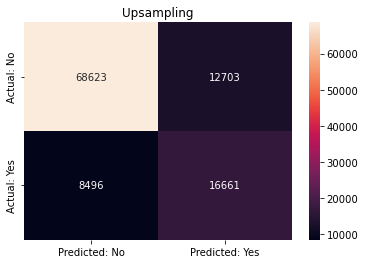



              precision    recall  f1-score   support

           0       0.89      0.84      0.87     81326
           1       0.57      0.66      0.61     25157

    accuracy                           0.80    106483
   macro avg       0.73      0.75      0.74    106483
weighted avg       0.81      0.80      0.81    106483



In [49]:
algo(DecisionTreeClassifier, X_up , X_test , y_up , y_test,'Upsampling')  # Upsampling

Accuracy Score : - 0.778312031028427




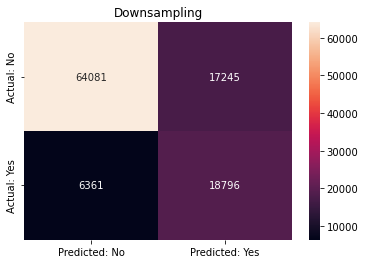



              precision    recall  f1-score   support

           0       0.91      0.79      0.84     81326
           1       0.52      0.75      0.61     25157

    accuracy                           0.78    106483
   macro avg       0.72      0.77      0.73    106483
weighted avg       0.82      0.78      0.79    106483



In [50]:
algo(DecisionTreeClassifier,X_down , X_test, y_down , y_test , 'Downsampling')  # Downsampling

Accuracy Score : - 0.8053210371608613




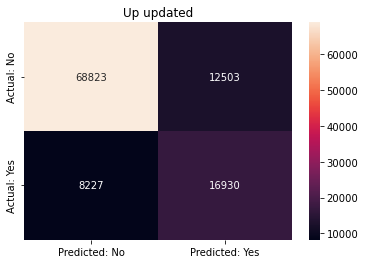



              precision    recall  f1-score   support

           0       0.89      0.85      0.87     81326
           1       0.58      0.67      0.62     25157

    accuracy                           0.81    106483
   macro avg       0.73      0.76      0.74    106483
weighted avg       0.82      0.81      0.81    106483



In [29]:
algo(DecisionTreeClassifier,X_up_updated , X_test , y_up_updated , y_test , 'Up updated')  # Updated upsampling

Accuracy Score : - 0.7108176892086061




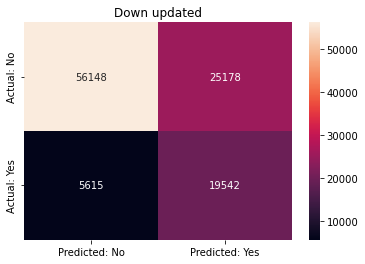



              precision    recall  f1-score   support

           0       0.91      0.69      0.78     81326
           1       0.44      0.78      0.56     25157

    accuracy                           0.71    106483
   macro avg       0.67      0.73      0.67    106483
weighted avg       0.80      0.71      0.73    106483



In [30]:
algo(DecisionTreeClassifier,X_down_updated , X_test , y_down_updated , y_test , 'Down updated') #updated Downsampling

# Ensemble (Random Forest)

Accuracy Score : - 0.850849431364631




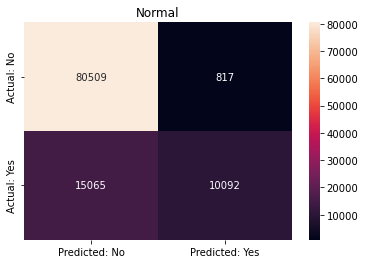



              precision    recall  f1-score   support

           0       0.84      0.99      0.91     81326
           1       0.93      0.40      0.56     25157

    accuracy                           0.85    106483
   macro avg       0.88      0.70      0.73    106483
weighted avg       0.86      0.85      0.83    106483



In [62]:
algo(RandomForestClassifier, X_train , X_test , y_train , y_test,'Normal')  # Upsampling

Accuracy Score : - 0.8307617178328935




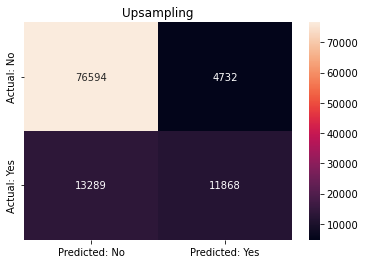



              precision    recall  f1-score   support

           0       0.85      0.94      0.89     81326
           1       0.71      0.47      0.57     25157

    accuracy                           0.83    106483
   macro avg       0.78      0.71      0.73    106483
weighted avg       0.82      0.83      0.82    106483



In [51]:
algo(RandomForestClassifier, X_up , X_test , y_up , y_test,'Upsampling')  # Upsampling

Accuracy Score : - 0.8436651859921303




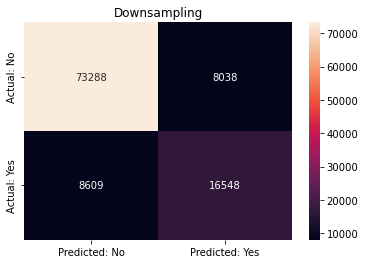



              precision    recall  f1-score   support

           0       0.89      0.90      0.90     81326
           1       0.67      0.66      0.67     25157

    accuracy                           0.84    106483
   macro avg       0.78      0.78      0.78    106483
weighted avg       0.84      0.84      0.84    106483



In [52]:
algo(RandomForestClassifier,X_down , X_test, y_down , y_test , 'Downsampling')  # Downsampling

Accuracy Score : - 0.8266859498699323




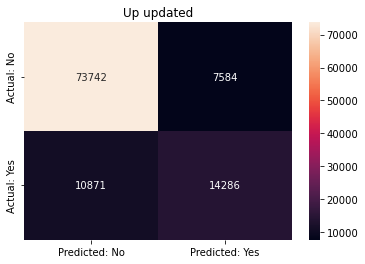



              precision    recall  f1-score   support

           0       0.87      0.91      0.89     81326
           1       0.65      0.57      0.61     25157

    accuracy                           0.83    106483
   macro avg       0.76      0.74      0.75    106483
weighted avg       0.82      0.83      0.82    106483



In [33]:
algo(RandomForestClassifier,X_up_updated , X_test , y_up_updated , y_test , 'Up updated')  # Updated upsampling

Accuracy Score : - 0.6461313073448344




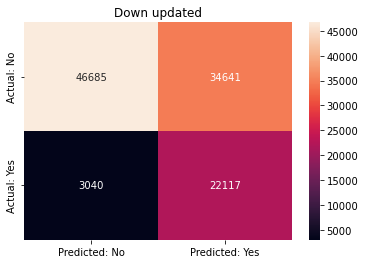



              precision    recall  f1-score   support

           0       0.94      0.57      0.71     81326
           1       0.39      0.88      0.54     25157

    accuracy                           0.65    106483
   macro avg       0.66      0.73      0.63    106483
weighted avg       0.81      0.65      0.67    106483



In [34]:
algo(RandomForestClassifier,X_down_updated , X_test , y_down_updated , y_test , 'Down updated') #updated Downsampling

# AdaBoost

Accuracy Score : - 0.8275968934008245




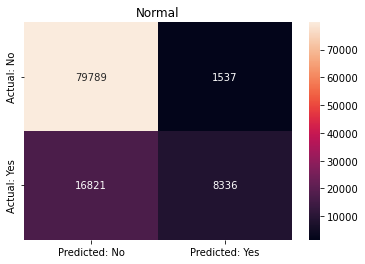



              precision    recall  f1-score   support

           0       0.83      0.98      0.90     81326
           1       0.84      0.33      0.48     25157

    accuracy                           0.83    106483
   macro avg       0.84      0.66      0.69    106483
weighted avg       0.83      0.83      0.80    106483



In [63]:
algo(AdaBoostClassifier, X_train , X_test , y_train , y_test,'Normal')  # Upsampling

Accuracy Score : - 0.7634082435693961




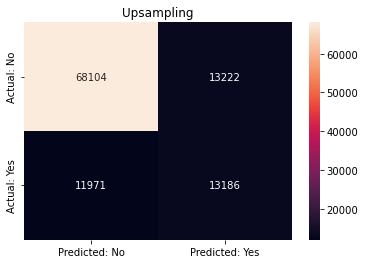



              precision    recall  f1-score   support

           0       0.85      0.84      0.84     81326
           1       0.50      0.52      0.51     25157

    accuracy                           0.76    106483
   macro avg       0.67      0.68      0.68    106483
weighted avg       0.77      0.76      0.77    106483



In [53]:
algo(AdaBoostClassifier, X_up , X_test , y_up , y_test,'Upsampling')  # Upsampling

Accuracy Score : - 0.7765370998187504




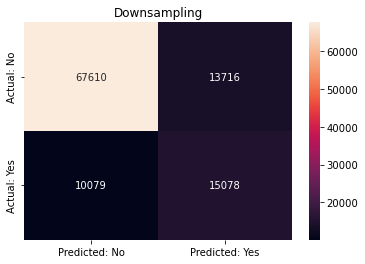



              precision    recall  f1-score   support

           0       0.87      0.83      0.85     81326
           1       0.52      0.60      0.56     25157

    accuracy                           0.78    106483
   macro avg       0.70      0.72      0.70    106483
weighted avg       0.79      0.78      0.78    106483



In [54]:
algo(AdaBoostClassifier,X_down , X_test, y_down , y_test , 'Downsampling')  # Downsampling

Accuracy Score : - 0.69785787402684




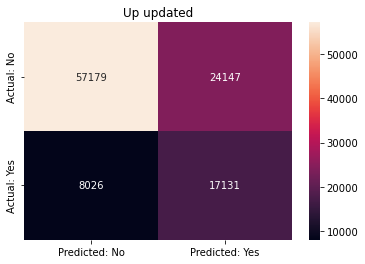



              precision    recall  f1-score   support

           0       0.88      0.70      0.78     81326
           1       0.42      0.68      0.52     25157

    accuracy                           0.70    106483
   macro avg       0.65      0.69      0.65    106483
weighted avg       0.77      0.70      0.72    106483



In [37]:
algo(AdaBoostClassifier,X_up_updated , X_test , y_up_updated , y_test , 'Up updated')  # Updated upsampling

Accuracy Score : - 0.4995727017458186




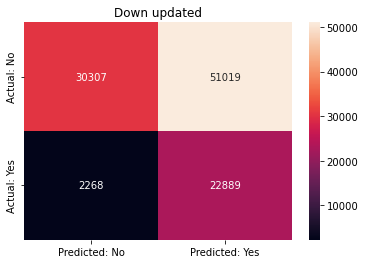



              precision    recall  f1-score   support

           0       0.93      0.37      0.53     81326
           1       0.31      0.91      0.46     25157

    accuracy                           0.50    106483
   macro avg       0.62      0.64      0.50    106483
weighted avg       0.78      0.50      0.52    106483



In [38]:
algo(AdaBoostClassifier,X_down_updated , X_test , y_down_updated , y_test , 'Down updated') #updated Downsampling

# Gradient Boost

Accuracy Score : - 0.8368847609477569




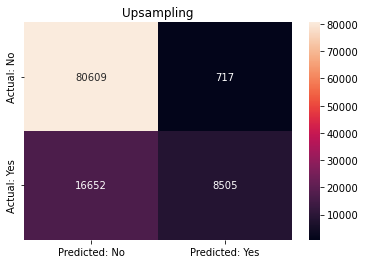



              precision    recall  f1-score   support

           0       0.83      0.99      0.90     81326
           1       0.92      0.34      0.49     25157

    accuracy                           0.84    106483
   macro avg       0.88      0.66      0.70    106483
weighted avg       0.85      0.84      0.81    106483



In [64]:
algo(GradientBoostingClassifier, X_train , X_test , y_train , y_test,'Normal')  # Upsampling

Accuracy Score : - 0.7941925002113014




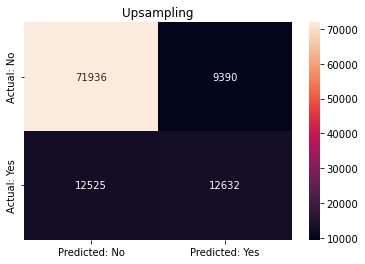



              precision    recall  f1-score   support

           0       0.85      0.88      0.87     81326
           1       0.57      0.50      0.54     25157

    accuracy                           0.79    106483
   macro avg       0.71      0.69      0.70    106483
weighted avg       0.79      0.79      0.79    106483



In [55]:
algo(GradientBoostingClassifier, X_up , X_test , y_up , y_test,'Upsampling')  # Upsampling

Accuracy Score : - 0.8119136387968032




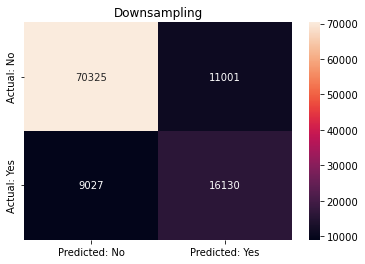



              precision    recall  f1-score   support

           0       0.89      0.86      0.88     81326
           1       0.59      0.64      0.62     25157

    accuracy                           0.81    106483
   macro avg       0.74      0.75      0.75    106483
weighted avg       0.82      0.81      0.81    106483



In [56]:
algo(GradientBoostingClassifier,X_down , X_test, y_down , y_test , 'Downsampling')  # Downsampling

Accuracy Score : - 0.7296282035630101




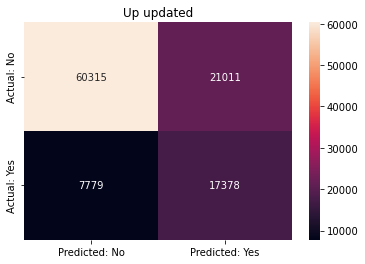



              precision    recall  f1-score   support

           0       0.89      0.74      0.81     81326
           1       0.45      0.69      0.55     25157

    accuracy                           0.73    106483
   macro avg       0.67      0.72      0.68    106483
weighted avg       0.78      0.73      0.75    106483



In [41]:
algo(GradientBoostingClassifier,X_up_updated , X_test , y_up_updated , y_test , 'Up updated')  # Updated upsampling

Accuracy Score : - 0.5028314378821033




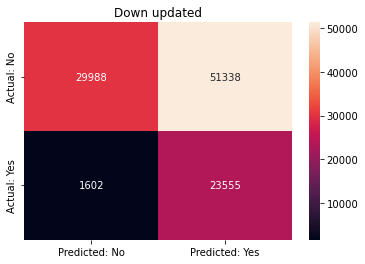



              precision    recall  f1-score   support

           0       0.95      0.37      0.53     81326
           1       0.31      0.94      0.47     25157

    accuracy                           0.50    106483
   macro avg       0.63      0.65      0.50    106483
weighted avg       0.80      0.50      0.52    106483



In [42]:
algo(GradientBoostingClassifier,X_down_updated , X_test , y_down_updated , y_test , 'Down updated') #updated Downsampling

# XGBoost

Accuracy Score : - 0.9113003953682748




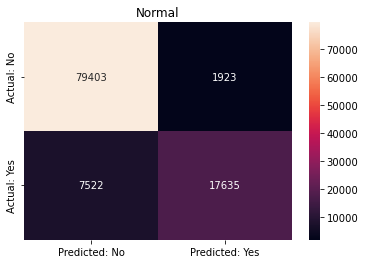



              precision    recall  f1-score   support

           0       0.91      0.98      0.94     81326
           1       0.90      0.70      0.79     25157

    accuracy                           0.91    106483
   macro avg       0.91      0.84      0.87    106483
weighted avg       0.91      0.91      0.91    106483



In [65]:
algo(XGBClassifier, X_train , X_test , y_train , y_test,'Normal')  # Upsampling

Accuracy Score : - 0.8974390278260379




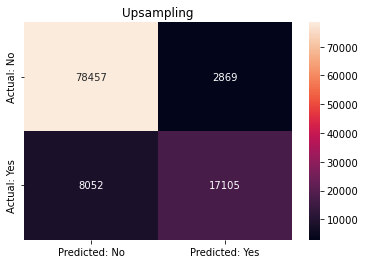



              precision    recall  f1-score   support

           0       0.91      0.96      0.93     81326
           1       0.86      0.68      0.76     25157

    accuracy                           0.90    106483
   macro avg       0.88      0.82      0.85    106483
weighted avg       0.89      0.90      0.89    106483



In [57]:
algo(XGBClassifier, X_up , X_test , y_up , y_test,'Upsampling')  # Upsampling

Accuracy Score : - 0.9094127701135393




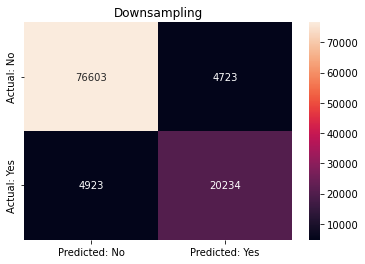



              precision    recall  f1-score   support

           0       0.94      0.94      0.94     81326
           1       0.81      0.80      0.81     25157

    accuracy                           0.91    106483
   macro avg       0.88      0.87      0.87    106483
weighted avg       0.91      0.91      0.91    106483



In [58]:
algo(XGBClassifier,X_down , X_test, y_down , y_test , 'Downsampling')  # Downsampling

Accuracy Score : - 0.8960303522628025




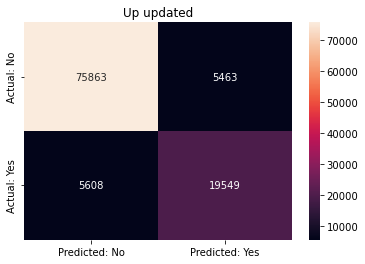



              precision    recall  f1-score   support

           0       0.93      0.93      0.93     81326
           1       0.78      0.78      0.78     25157

    accuracy                           0.90    106483
   macro avg       0.86      0.85      0.86    106483
weighted avg       0.90      0.90      0.90    106483



In [45]:
algo(XGBClassifier,X_up_updated , X_test , y_up_updated , y_test , 'Up updated')  # Updated upsampling

Accuracy Score : - 0.7830076162392119




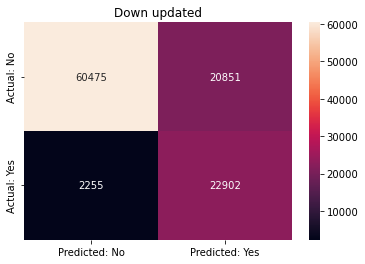



              precision    recall  f1-score   support

           0       0.96      0.74      0.84     81326
           1       0.52      0.91      0.66     25157

    accuracy                           0.78    106483
   macro avg       0.74      0.83      0.75    106483
weighted avg       0.86      0.78      0.80    106483



In [46]:
algo(XGBClassifier,X_down_updated , X_test , y_down_updated , y_test , 'Down updated') #updated Downsampling

# Inference 

* ALL of the algorithms the downsampling has a good f1 score *

In [ ]:
{'Logistic_regression':}
{'Decision_tree' : }
{'Adaboost':}
{'Gradient Boost' :}
{'XGB' : }
{'loan_status' : [1,0,1,0,1,0,1,0,1,0]}

# Outliers Treatment

In [23]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1

In [16]:
df_no_out = df1[~((df1 < (q1 - 1.5 * iqr)) | (df1 > (q3 + 1.5 * iqr))).any(axis = 1)]
df_no_out.shape

(127311, 29)

In [22]:
df_no_out.loan_status.value_counts()

0    127311
Name: loan_status, dtype: int64

# Zeros Treatment

In [26]:
def zero(*feat):
    for var in feat:
        print(var ,':', len(df[var][df[var] == 0]) / len(df) * 100)
        
zero('delinq_2yrs','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med',
     'acc_now_delinq','tot_coll_amt')      
        

delinq_2yrs : 80.7840544540694
total_rec_late_fee : 98.60258596725843
recoveries : 97.23860468960129
collection_recovery_fee : 97.37008181633773
collections_12_mths_ex_med : 98.68767045070359
acc_now_delinq : 99.5373883383545
tot_coll_amt : 86.94225524593736


Accuracy Score : - 0.8753175404409175




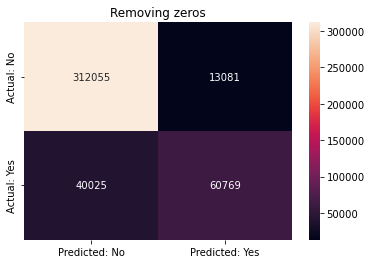



              precision    recall  f1-score   support

           0       0.89      0.96      0.92    325136
           1       0.82      0.60      0.70    100794

    accuracy                           0.88    425930
   macro avg       0.85      0.78      0.81    425930
weighted avg       0.87      0.88      0.87    425930



In [30]:
df_trail_1 = df.drop(['delinq_2yrs','total_rec_late_fee','recoveries','collection_recovery_fee',
                      'collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','funded_amnt' ,
                      'funded_amnt_inv' ,'revol_bal' ] , axis = 1)

X_trail_1 = df_trail_1.drop('loan_status' , axis = 1 )
y_trail_1 = df.loan_status

X_train_trail_1 , X_test_trail_1 , y_train_trail_1 , y_test_trail_1 = train_test_split(X_trail_1 , y_trail_1 , test_size = 0.8 ,random_state = 10 )


algo(XGBClassifier,X_train_trail_1 , X_test_trail_1 , y_train_trail_1 , y_test_trail_1 , 'Removing zeros') 


Zeros treatment with upsampling and updated upsampling

In [44]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 20, random_state = 1)   # UpSampling
X_up , y_up = sm.fit_resample(X_train_trail_1 , y_train_trail_1 )
df_up = pd.concat([X_up , y_up] , axis = 1)   

rm = RandomUnderSampler()                                              # DownSampling
X_down , y_down = rm.fit_resample(X_train_trail_1 , y_train_trail_1 )
df_down = pd.concat([X_down , y_down] , axis = 1)  


df_up_1 = df_up[df_up.loan_status == 1]                    # Defaulters in upsampled dataframe


df_down_1 = df_down[df_down.loan_status == 1]                # Defaulters in Downsapled dataframe


df_up_down1 = pd.concat([df_up , df_down_1] , axis = 0)      # Add the downsampled defaulters into the upsampled dataframe
df_down_up1 = pd.concat([df_down , df_up_1] , axis = 0)    # Add the upsampled defaulters to the downsampled dataframe 

X_up_updated = df_up_down1.drop(['loan_status'] , axis = 1)
y_up_updated = df_up_down1.loan_status

X_down_updated = df_down_up1.drop(['loan_status'] , axis = 1)
y_down_updated = df_down_up1.loan_status

# Trying AdaBoost in zero's removed cols

Accuracy Score : - 0.7351348813185266




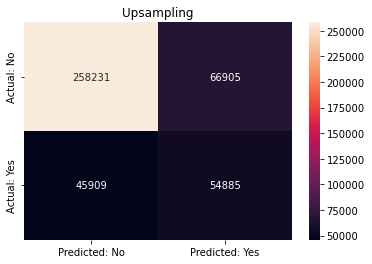



              precision    recall  f1-score   support

           0       0.85      0.79      0.82    325136
           1       0.45      0.54      0.49    100794

    accuracy                           0.74    425930
   macro avg       0.65      0.67      0.66    425930
weighted avg       0.75      0.74      0.74    425930

Accuracy Score : - 0.7260770549151269




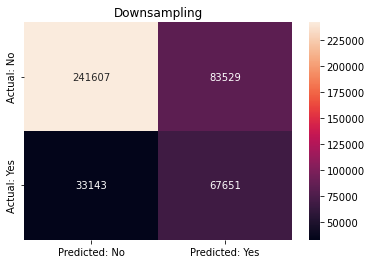



              precision    recall  f1-score   support

           0       0.88      0.74      0.81    325136
           1       0.45      0.67      0.54    100794

    accuracy                           0.73    425930
   macro avg       0.66      0.71      0.67    425930
weighted avg       0.78      0.73      0.74    425930

Accuracy Score : - 0.6948090061747235




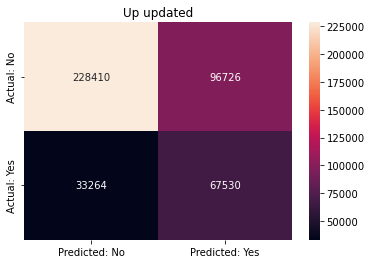



              precision    recall  f1-score   support

           0       0.87      0.70      0.78    325136
           1       0.41      0.67      0.51    100794

    accuracy                           0.69    425930
   macro avg       0.64      0.69      0.64    425930
weighted avg       0.76      0.69      0.71    425930

Accuracy Score : - 0.46954429131547437




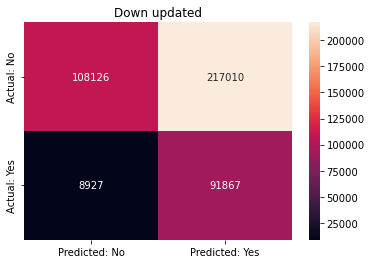



              precision    recall  f1-score   support

           0       0.92      0.33      0.49    325136
           1       0.30      0.91      0.45    100794

    accuracy                           0.47    425930
   macro avg       0.61      0.62      0.47    425930
weighted avg       0.78      0.47      0.48    425930



In [46]:
algo(AdaBoostClassifier, X_up , X_test_trail_1 , y_up , y_test_trail_1,'Upsampling')  # Upsampling
algo(AdaBoostClassifier,X_down , X_test_trail_1, y_down , y_test_trail_1 , 'Downsampling')  # Downsampling
algo(AdaBoostClassifier,X_up_updated , X_test_trail_1 , y_up_updated , y_test_trail_1 , 'Up updated')  # Updated upsampling
algo(AdaBoostClassifier,X_down_updated , X_test_trail_1 , y_down_updated , y_test_trail_1 , 'Down updated') #updated Downsampling

Accuracy Score : - 0.8623435775831709




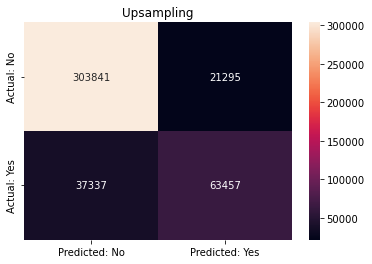



              precision    recall  f1-score   support

           0       0.89      0.93      0.91    325136
           1       0.75      0.63      0.68    100794

    accuracy                           0.86    425930
   macro avg       0.82      0.78      0.80    425930
weighted avg       0.86      0.86      0.86    425930

Accuracy Score : - 0.8560608550700819




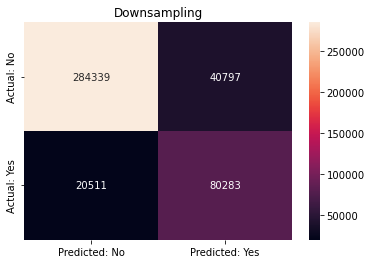



              precision    recall  f1-score   support

           0       0.93      0.87      0.90    325136
           1       0.66      0.80      0.72    100794

    accuracy                           0.86    425930
   macro avg       0.80      0.84      0.81    425930
weighted avg       0.87      0.86      0.86    425930

Accuracy Score : - 0.8599488178808724




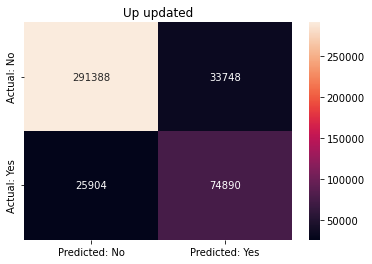



              precision    recall  f1-score   support

           0       0.92      0.90      0.91    325136
           1       0.69      0.74      0.72    100794

    accuracy                           0.86    425930
   macro avg       0.80      0.82      0.81    425930
weighted avg       0.86      0.86      0.86    425930

Accuracy Score : - 0.7317704787171601




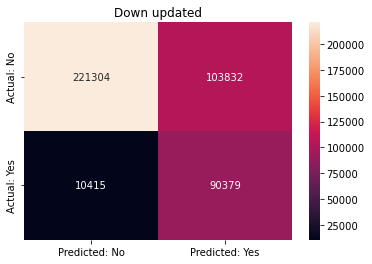



              precision    recall  f1-score   support

           0       0.96      0.68      0.79    325136
           1       0.47      0.90      0.61    100794

    accuracy                           0.73    425930
   macro avg       0.71      0.79      0.70    425930
weighted avg       0.84      0.73      0.75    425930



In [47]:
algo(XGBClassifier, X_up , X_test_trail_1 , y_up , y_test_trail_1,'Upsampling')  # Upsampling
algo(XGBClassifier,X_down , X_test_trail_1, y_down , y_test_trail_1 , 'Downsampling')  # Downsampling
algo(XGBClassifier,X_up_updated , X_test_trail_1 , y_up_updated , y_test_trail_1 , 'Up updated')  # Updated upsampling
algo(XGBClassifier,X_down_updated , X_test_trail_1 , y_down_updated , y_test_trail_1 , 'Down updated') #updated Downsampling

# concat downsampled data to default data of upsampled 

In [61]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X = df1.drop(['loan_status'] , axis = 1)
y = df1['loan_status']

rus = RandomUnderSampler()                                                            # downsampling
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 10, test_size = 0.2)
X_us , y_us = rus.fit_resample(X_train , y_train)



In [62]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors=5, random_state = 1)                # upsampling
X_train_rev , y_train_rev = sm.fit_resample(X_train , y_train.ravel())

y_train_rev = pd.Series(y_train_rev)

In [63]:
df_up = pd.concat([X_train_rev , y_train_rev ] , axis = 1)  # Upsampling dataframe
df_up = df_up.rename(columns = {0:'loan_status'})

df_down = pd.concat([X_us ,y_us] , axis = 1)   # Downsampling dataframe

In [65]:
df_up_1 = df_up[df_up.loan_status == 1]     # Default 1 from upsampling         # mixing
df_big = pd.concat([df_down , df_up_1] , axis = 0)   

df_big.loan_status.value_counts()

1    425929
0    100657
Name: loan_status, dtype: int64

Accuracy Score : - 0.7803874796915939




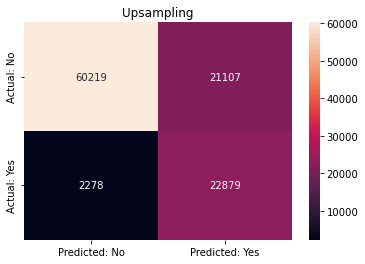



              precision    recall  f1-score   support

           0       0.96      0.74      0.84     81326
           1       0.52      0.91      0.66     25157

    accuracy                           0.78    106483
   macro avg       0.74      0.82      0.75    106483
weighted avg       0.86      0.78      0.80    106483



In [66]:
X = df_big.drop(['loan_status'] , axis = 1)
y = df_big.loan_status

algo(XGBClassifier,X, X_test, y, y_test,'Upsampling')

# adding up + small down

In [70]:
df_big.loan_status.value_counts()

1    425929
0    100657
Name: loan_status, dtype: int64

Accuracy Score : - 0.8967065165331555




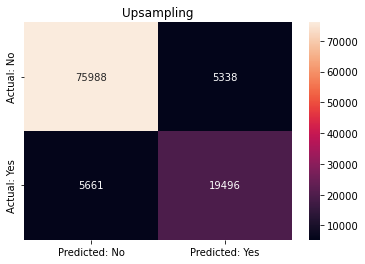



              precision    recall  f1-score   support

           0       0.93      0.93      0.93     81326
           1       0.79      0.77      0.78     25157

    accuracy                           0.90    106483
   macro avg       0.86      0.85      0.86    106483
weighted avg       0.90      0.90      0.90    106483



In [69]:
X = df_trial_2.drop(['loan_status'] , axis = 1)
y = df_trial_2.loan_status

algo(XGBClassifier,X, X_test, y, y_test,'Upsampling')

# Grid search

In [8]:
from sklearn.model_selection import GridSearchCV

params = {  'n_estimators' : [ 100 , 120],
    'learning_rate' : [0.15, 0.2], 
    'gamma' : [7,8],
    'max_depth' : [7,8]}

grid_xgb = GridSearchCV(XGBClassifier(), params)
grid_xgb.fit(X, y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [7, 8], 'learning_rate': [0.15, 0.2],
                         'max_depth': [7, 8], 'n_estimators': [100, 120]})

In [9]:
print(grid_xgb.best_params_)

{'gamma': 8, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 120}


In [10]:
best_xgb = grid_xgb.best_estimator_
best_xgb.score(X_test,y_test)


0.9181841232872853

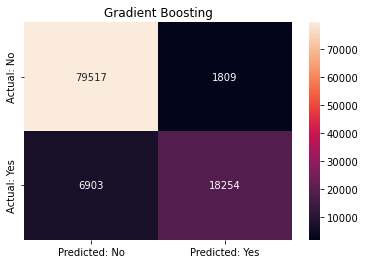



              precision    recall  f1-score   support

           0       0.92      0.98      0.95     81326
           1       0.91      0.73      0.81     25157

    accuracy                           0.92    106483
   macro avg       0.91      0.85      0.88    106483
weighted avg       0.92      0.92      0.91    106483



In [11]:
y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                        index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Gradient Boosting')
plt.show()
    
print('\n')
print(classification_report(y_test , y_pred))

In [13]:
params = {  'n_estimators' : [ 4 , 5],
    'learning_rate' : [0.15, 0.2], 
    'gamma' : [7,8],
    'max_depth' : [7,8]}

grid_xgb1 = GridSearchCV(XGBClassifier(), params)
grid_xgb1.fit(X, y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [7, 8], 'learning_rate': [0.15, 0.2],
                         'max_depth': [7, 8], 'n_estimators': [4, 5]})

In [14]:
best_xgb = grid_xgb.best_estimator_
best_xgb.score(X_test,y_test)

0.9181841232872853

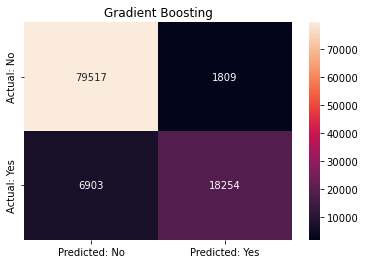



              precision    recall  f1-score   support

           0       0.92      0.98      0.95     81326
           1       0.91      0.73      0.81     25157

    accuracy                           0.92    106483
   macro avg       0.91      0.85      0.88    106483
weighted avg       0.92      0.92      0.91    106483



In [15]:
y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                        index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Gradient Boosting')
plt.show()
    
print('\n')
print(classification_report(y_test , y_pred))

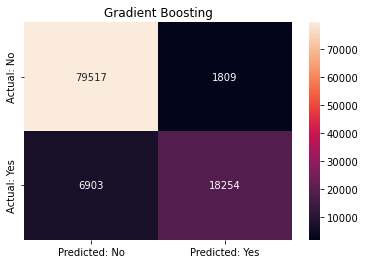



              precision    recall  f1-score   support

           0       0.92      0.98      0.95     81326
           1       0.91      0.73      0.81     25157

    accuracy                           0.92    106483
   macro avg       0.91      0.85      0.88    106483
weighted avg       0.92      0.92      0.91    106483



In [17]:
params = {  'n_estimators' : [ 2 , 3],
    'learning_rate' : [0.8,1.2], 
    'gamma' : [9,10],
    'max_depth' : [9,10]}

grid_xgb1 = GridSearchCV(XGBClassifier(), params)
grid_xgb1.fit(X, y)

best_xgb = grid_xgb.best_estimator_
best_xgb.score(X_test,y_test)

y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                        index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Gradient Boosting')
plt.show()
    
print('\n')
print(classification_report(y_test , y_pred))

In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 20, random_state = 1)   # UpSampling

X_up , y_up = sm.fit_resample(X_train , y_train )

df_up = pd.concat([X_up , y_up] , axis = 1)  

In [12]:
# Sample the data and try
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report

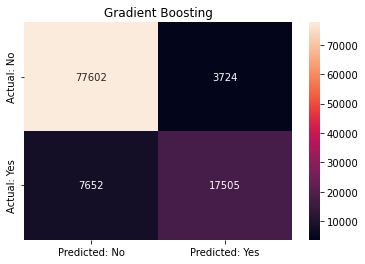



              precision    recall  f1-score   support

           0       0.91      0.95      0.93     81326
           1       0.82      0.70      0.75     25157

    accuracy                           0.89    106483
   macro avg       0.87      0.83      0.84    106483
weighted avg       0.89      0.89      0.89    106483



In [15]:
params = {  'n_estimators' : [10,30],
    'learning_rate' : [1 , 1.1], 
    'gamma' : [9,10],
    'max_depth' : [5,6]}

grid_xgb1 = GridSearchCV(XGBClassifier(), params)
grid_xgb1.fit(X_up, y_up)

best_xgb = grid_xgb1.best_estimator_
best_xgb.score(X_test,y_test)

y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                        index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Gradient Boosting')
plt.show()
    
print('\n')
print(classification_report(y_test , y_pred))

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rm = RandomUnderSampler()                                              # DownSampling

X_down , y_down = rm.fit_resample(X_train , y_train )

df_down = pd.concat([X_down , y_down] , axis = 1)                      # Downsampled Dataframe 

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix

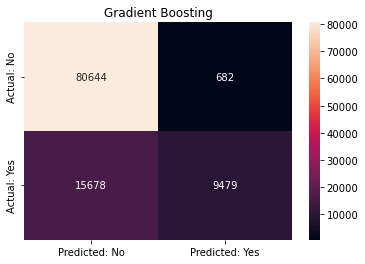



              precision    recall  f1-score   support

           0       0.84      0.99      0.91     81326
           1       0.93      0.38      0.54     25157

    accuracy                           0.85    106483
   macro avg       0.89      0.68      0.72    106483
weighted avg       0.86      0.85      0.82    106483



In [11]:
params = {  'n_estimators' : [ 2 , 3],
    'learning_rate' : [0.01, 0.2], 
    'gamma' : [9,10],
    'max_depth' : [9,10]}

grid_xgb1 = GridSearchCV(XGBClassifier(), params)
grid_xgb1.fit(X_train, y_train)

best_xgb = grid_xgb1.best_estimator_
best_xgb.score(X_up,y_up)

y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                        index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Gradient Boosting')
plt.show()
    
print('\n')
print(classification_report(y_test , y_pred))

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report

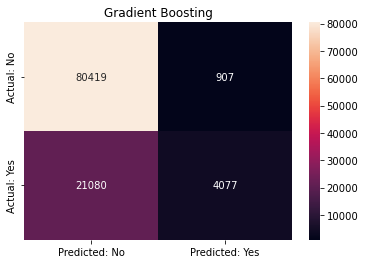



              precision    recall  f1-score   support

           0       0.79      0.99      0.88     81326
           1       0.82      0.16      0.27     25157

    accuracy                           0.79    106483
   macro avg       0.81      0.58      0.58    106483
weighted avg       0.80      0.79      0.74    106483



In [11]:
params = {   'n_estimators' : [3,4],
   'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}

grid_xgb1 = GridSearchCV(AdaBoostClassifier(), params)
grid_xgb1.fit(X_train, y_train)

best_xgb = grid_xgb1.best_estimator_
best_xgb.score(X_test,y_test)

y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                        index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Gradient Boosting')
plt.show()
    
print('\n')
print(classification_report(y_test , y_pred))

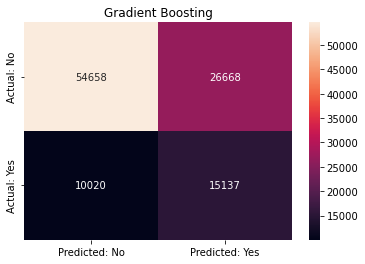



              precision    recall  f1-score   support

           0       0.85      0.67      0.75     81326
           1       0.36      0.60      0.45     25157

    accuracy                           0.66    106483
   macro avg       0.60      0.64      0.60    106483
weighted avg       0.73      0.66      0.68    106483



In [13]:
params = {   'n_estimators' : [3,4],
   'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}

grid_xgb1 = GridSearchCV(AdaBoostClassifier(), params)
grid_xgb1.fit(X_up, y_up)

best_xgb = grid_xgb1.best_estimator_
best_xgb.score(X_test , y_test)

y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                        index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.title('Gradient Boosting')
plt.show()
    
print('\n')
print(classification_report(y_test , y_pred))

# USL - DBSCAN

In [22]:
df = pd.read_csv('train_indessa.csv')

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_status
0,14350,14350,14350.0,0,19.19,9,28700.0,1,33.88,0,1,50,14,1,22515,73.1,28,0,1173.84,0.0,0.0,0.0,0,26,0,0,28699.0,30800,33,0,1,0,0
1,4800,4800,4800.0,0,10.99,0,65000.0,1,3.64,0,1,0,6,0,7624,23.2,13,1,83.95,0.0,0.0,0.0,0,9,0,0,9974.0,32900,62,0,1,0,0
2,10000,10000,10000.0,0,7.26,2,45000.0,0,18.42,0,0,0,5,0,10877,31.2,19,1,56.47,0.0,0.0,0.0,0,9,0,65,38295.0,34900,72,0,0,0,0
3,15000,15000,15000.0,0,19.72,10,105000.0,0,14.97,0,2,46,10,0,13712,55.5,21,0,4858.62,0.0,0.0,0.0,0,135,0,0,55564.0,24700,41,0,1,0,0
4,16000,16000,16000.0,0,10.64,10,52000.0,2,20.16,0,0,0,11,0,35835,76.2,27,1,2296.41,0.0,0.0,0.0,0,96,0,0,47159.0,47033,64,0,0,1,0


In [7]:
df_default = df[df['loan_status'] == 1]
df_default.shape

(125814, 33)

In [8]:
df_default = df_default.drop(['verification_status' , 'initial_list_status','grade_num',
                              'addr_state_NE','addr_state_S' ,'addr_state_W',
                              'loan_status'] , axis = 1)
                                           

In [9]:
from sklearn.preprocessing import StandardScaler

SE = StandardScaler()

scaled = SE.fit_transform(df_default)

df_dbscan = pd.DataFrame(data = scaled , columns = df_default.columns)

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
db = DBSCAN(eps = 1.5, min_samples=50)

cluster = db.fit(df_dbscan)
B = cluster.labels_
print(B)

[-1 -1  0 ... -1  0 -1]


In [12]:
db = DBSCAN(eps = 2, min_samples=10)

cluster = db.fit(df_dbscan)
C = cluster.labels_
print(C)

[-1  0  0 ...  0  0  2]


In [13]:
db = DBSCAN(eps = 2.5, min_samples=30)

cluster = db.fit(df_dbscan)
A = cluster.labels_
print(A)

[0 0 0 ... 0 0 1]


In [14]:
df_after = df[df['loan_status'] == 1]
df_after.shape

(125814, 33)

In [15]:
df_after['A'] = A 
df_after['B'] = B 
df_after['C'] = C 

<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc'>

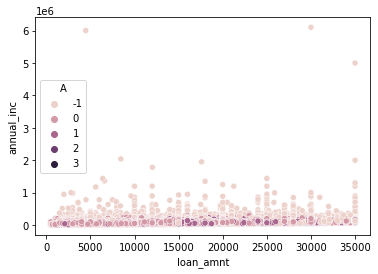

In [17]:
sns.scatterplot(df_after['loan_amnt'] , df_after['annual_inc'] , hue = df_after['A'])

In [17]:
df_after['A'].value_counts()

 0    92102
 1    19079
-1    14062
 2      536
 3       35
Name: A, dtype: int64

In [18]:
df_after['B'].value_counts()

-1    95709
 0    29214
 1      799
 3       50
 2       42
Name: B, dtype: int64

In [19]:
df_after['C'].value_counts()

 0     74685
-1     27978
 2     12887
 1      8684
 3       871
 5       326
 4       313
 7        20
 8        11
 9        11
 6         9
 10        7
 11        6
 12        6
Name: C, dtype: int64

# Cluster A with 4 clusters and 1 noise

* 0,1,2,3,  -1

In [16]:
A0 = df_after[df_after['A'] == 0]
A1 = df_after[df_after['A'] == 1]
A2 = df_after[df_after['A'] == 2]
A3 = df_after[df_after['A'] == 3]
A_1 = df_after[df_after['A'] == -1]


In [17]:
A0.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_status,A,B,C
count,92102.000000,92102.000000,92102.000000,92102.0,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.0,92102.0,92102.0,92102.000000,92102.0,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.0,92102.0,92102.000000,92102.000000
mean,11354.246922,11333.681679,11232.601684,0.0,12.282602,5.455061,66296.692645,0.863760,15.969117,0.185381,0.775151,15.282535,10.455766,0.121528,12791.903596,52.743686,23.793077,0.254902,1459.266201,0.000011,0.0,0.0,0.0,81.291633,0.0,42.620985,107374.437319,25416.038284,59.581203,0.202048,0.338744,0.303338,1.0,0.0,-0.661918,0.021976
std,6805.290311,6796.775922,6821.969866,0.0,3.732176,3.711683,32948.276076,0.846348,7.638708,0.523151,1.009561,22.663674,4.459166,0.345541,10797.976611,24.736250,11.023706,0.435809,1318.123601,0.001771,0.0,0.0,0.0,50.104985,0.0,256.574770,103468.310363,16287.324220,10.660901,0.401530,0.473285,0.459702,0.0,0.0,0.500386,0.533678
min,500.000000,500.000000,0.000000,0.0,5.320000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.0,0.0,-1.000000,-1.000000
25%,6000.000000,6000.000000,6000.000000,0.0,9.170000,2.000000,43000.000000,0.000000,10.280000,0.000000,0.000000,0.000000,7.000000,0.000000,5399.000000,34.400000,16.000000,0.000000,549.855000,0.000000,0.0,0.0,0.0,39.000000,0.0,0.000000,35116.250000,15700.000000,53.000000,0.000000,0.000000,0.000000,1.0,0.0,-1.000000,0.000000
50%,10000.000000,10000.000000,10000.000000,0.0,12.120000,5.000000,60000.000000,1.000000,15.585000,0.000000,0.000000,0.000000,10.000000,0.000000,9932.000000,54.000000,22.000000,0.000000,1105.095000,0.000000,0.0,0.0,0.0,74.000000,0.0,0.000000,80669.500000,23700.000000,62.000000,0.000000,0.000000,0.000000,1.0,0.0,-1.000000,0.000000
75%,15000.000000,15000.000000,15000.000000,0.0,14.640000,10.000000,82000.000000,2.000000,21.310000,0.000000,1.000000,28.000000,13.000000,0.000000,17027.000000,72.100000,30.000000,1.000000,1976.422500,0.000000,0.0,0.0,0.0,126.000000,0.0,0.000000,137233.000000,27600.000000,65.000000,0.000000,1.000000,1.000000,1.0,0.0,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,0.0,28.490000,10.000000,330000.000000,2.000000,39.990000,5.000000,8.000000,130.000000,36.000000,2.000000,120541.000000,127.400000,79.000000,1.000000,13409.940000,0.440000,0.0,0.0,0.0,230.000000,0.0,6505.000000,805972.000000,165300.000000,75.000000,1.000000,1.000000,1.000000,1.0,0.0,3.000000,11.000000


In [18]:
A1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_status,A,B,C
count,19079.000000,19079.000000,19079.000000,19079.0,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.0,19079.0,19079.0,19079.0,19079.000000,19079.0,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.000000,19079.0,19079.0,19079.0,19079.000000
mean,18766.833954,18649.887311,18597.272410,1.0,16.650901,6.281619,73859.727214,1.399916,17.265159,0.167724,0.777399,14.297814,11.065098,0.082656,16424.216940,57.002989,25.971330,0.363593,3215.741063,0.0,0.0,0.0,0.0,68.154306,0.0,30.147387,138220.940222,29289.237119,45.733581,0.202422,0.345039,0.286074,1.0,1.0,-1.0,1.220242
std,7289.132024,7284.137963,7284.982771,0.0,3.998391,3.632317,29857.287064,0.677644,7.432846,0.458195,0.959326,22.009795,4.375697,0.275560,11341.097595,23.629536,10.385088,0.481046,2685.001073,0.0,0.0,0.0,0.0,57.236274,0.0,181.682336,113009.932152,16988.900484,12.672218,0.401815,0.475393,0.451936,0.0,0.0,0.0,1.414335
min,1000.000000,1000.000000,950.000000,1.0,5.790000,0.000000,4800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.0,1.0,-1.0,-1.000000
25%,13250.000000,13000.000000,13000.000000,1.0,13.980000,3.000000,52000.000000,1.000000,11.900000,0.000000,0.000000,0.000000,8.000000,0.000000,8033.500000,40.400000,18.000000,0.000000,1215.935000,0.0,0.0,0.0,0.0,26.000000,0.0,0.000000,58114.000000,19600.000000,35.000000,0.000000,0.000000,0.000000,1.0,1.0,-1.0,-1.000000
50%,18000.000000,18000.000000,18000.000000,1.0,16.290000,7.000000,69000.000000,2.000000,16.970000,0.000000,0.000000,0.000000,11.000000,0.000000,14124.000000,58.900000,25.000000,0.000000,2535.510000,0.0,0.0,0.0,0.0,56.000000,0.0,0.000000,80669.500000,23700.000000,45.000000,0.000000,0.000000,0.000000,1.0,1.0,-1.0,2.000000
75%,24000.000000,24000.000000,23875.000000,1.0,19.240000,10.000000,90000.000000,2.000000,22.320000,0.000000,1.000000,26.000000,14.000000,0.000000,22463.500000,75.500000,33.000000,1.000000,4454.550000,0.0,0.0,0.0,0.0,91.000000,0.0,0.000000,204821.500000,35700.000000,54.000000,0.000000,1.000000,1.000000,1.0,1.0,-1.0,2.000000
max,35000.000000,35000.000000,35000.000000,1.0,28.490000,10.000000,250000.000000,2.000000,39.880000,4.000000,6.000000,106.000000,32.000000,2.000000,81287.000000,113.100000,71.000000,1.000000,18636.030000,0.0,0.0,0.0,0.0,274.000000,0.0,3802.000000,737820.000000,147500.000000,74.000000,1.000000,1.000000,1.000000,1.0,1.0,-1.0,12.000000


In [19]:
A2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_status,A,B,C
count,536.000000,536.000000,536.000000,536.0,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.0,536.0,536.0,536.000000,536.0,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.0,536.0,536.0,536.000000
mean,6850.000000,6844.822761,6505.469073,0.0,12.583825,3.916045,46829.082817,0.598881,14.170709,0.100746,0.791045,12.675373,8.037313,0.001866,8160.792910,55.360429,16.218284,0.067164,1298.634459,16.054298,0.0,0.0,0.0,136.097015,0.0,7.276119,73100.561567,21365.464552,57.587687,0.263060,0.333955,0.302239,1.0,2.0,-1.0,1.919776
std,3652.282605,3647.479288,3700.799978,0.0,3.255299,3.325692,23460.936226,0.783903,7.121553,0.330843,0.897137,20.991209,3.657601,0.043193,7724.188677,26.803412,7.934717,0.250540,842.519588,2.281153,0.0,0.0,0.0,37.168697,0.0,72.617718,32938.655482,6470.448784,10.566910,0.440706,0.472064,0.459657,0.0,0.0,0.0,2.466808
min,1000.000000,1000.000000,25.000000,0.0,5.420000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.500000,14.450063,0.0,0.0,0.0,17.000000,0.0,0.000000,118.000000,1500.000000,21.000000,0.000000,0.000000,0.000000,1.0,2.0,-1.0,-1.000000
25%,4000.000000,4000.000000,3600.000000,0.0,10.390000,1.000000,30000.000000,0.000000,8.640000,0.000000,0.000000,0.000000,5.000000,0.000000,2785.500000,37.025000,10.000000,0.000000,628.822500,14.975640,0.0,0.0,0.0,120.250000,0.0,0.000000,80669.500000,23700.000000,52.000000,0.000000,0.000000,0.000000,1.0,2.0,-1.0,-1.000000
50%,6000.000000,6000.000000,6000.000000,0.0,12.820000,3.000000,43000.000000,0.000000,14.295000,0.000000,1.000000,0.000000,7.000000,0.000000,6089.000000,57.500000,16.000000,0.000000,1111.180000,15.000000,0.0,0.0,0.0,156.000000,0.0,0.000000,80669.500000,23700.000000,61.000000,0.000000,0.000000,0.000000,1.0,2.0,-1.0,4.000000
75%,10000.000000,10000.000000,9600.000000,0.0,14.650000,6.000000,60000.000000,1.000000,19.410000,0.000000,1.000000,23.000000,11.000000,0.000000,11504.250000,76.200000,21.000000,0.000000,1902.897500,15.665500,0.0,0.0,0.0,161.000000,0.0,0.000000,80669.500000,23700.000000,64.000000,1.000000,1.000000,1.000000,1.0,2.0,-1.0,4.000000
max,18000.000000,18000.000000,17953.480000,0.0,21.700000,10.000000,150000.000000,2.000000,31.110000,2.000000,3.000000,80.000000,19.000000,1.000000,56984.000000,104.200000,43.000000,1.000000,4062.280000,26.180000,0.0,0.0,0.0,187.000000,0.0,1145.000000,281096.000000,47300.000000,75.000000,1.000000,1.000000,1.000000,1.0,2.0,-1.0,4.000000


In [20]:
A3.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_status,A,B,C
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.0,35.0,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.0,35.000000
mean,7127.857143,7127.857143,7126.428571,0.0,13.882571,6.257143,63362.857143,1.285714,13.570286,0.0,0.571429,3.714286,7.885714,3.0,5602.142857,52.514286,15.457143,0.285714,768.876286,0.0,0.0,0.0,0.0,46.885714,0.0,88.114286,44766.842857,11880.000000,54.628571,0.285714,0.342857,0.142857,1.0,3.0,-1.0,2.142857
std,3082.736391,3082.736391,3081.180678,0.0,2.423621,3.013137,19096.338608,0.710072,5.319779,0.0,0.739066,10.542830,2.179739,0.0,3348.003893,17.800102,5.867873,0.458349,518.600401,0.0,0.0,0.0,0.0,27.152913,0.0,234.254483,50181.405971,6969.462803,7.231816,0.458349,0.481594,0.355036,0.0,0.0,0.0,4.710082
min,1500.000000,1500.000000,1500.000000,0.0,8.180000,0.000000,30000.000000,0.000000,2.600000,0.0,0.000000,0.000000,4.000000,3.0,1024.000000,12.800000,8.000000,0.000000,64.400000,0.0,0.0,0.0,0.0,9.000000,0.0,0.000000,1499.000000,2400.000000,43.000000,0.000000,0.000000,0.000000,1.0,3.0,-1.0,-1.000000
25%,5000.000000,5000.000000,5000.000000,0.0,11.760000,4.000000,52000.000000,1.000000,10.320000,0.0,0.000000,0.000000,6.000000,3.0,3247.000000,42.900000,11.000000,0.000000,391.995000,0.0,0.0,0.0,0.0,26.000000,0.0,0.000000,17084.000000,6100.000000,51.000000,0.000000,0.000000,0.000000,1.0,3.0,-1.0,-1.000000
50%,7200.000000,7200.000000,7200.000000,0.0,13.980000,6.000000,60000.000000,1.000000,14.490000,0.0,0.000000,0.000000,8.000000,3.0,4676.000000,51.700000,14.000000,0.000000,601.890000,0.0,0.0,0.0,0.0,39.000000,0.0,0.000000,27534.000000,10000.000000,55.000000,0.000000,0.000000,0.000000,1.0,3.0,-1.0,-1.000000
75%,9450.000000,9450.000000,9450.000000,0.0,15.300000,9.000000,70000.000000,2.000000,16.775000,0.0,1.000000,0.000000,10.000000,3.0,7541.500000,67.550000,19.500000,1.000000,1008.045000,0.0,0.0,0.0,0.0,58.500000,0.0,0.000000,41022.000000,17050.000000,61.500000,1.000000,1.000000,0.000000,1.0,3.0,-1.0,9.000000
max,12300.000000,12300.000000,12300.000000,0.0,18.490000,10.000000,120386.000000,2.000000,27.150000,0.0,2.000000,36.000000,13.000000,3.0,13081.000000,85.700000,29.000000,1.000000,2213.560000,0.0,0.0,0.0,0.0,135.000000,0.0,950.000000,239188.000000,27200.000000,65.000000,1.000000,1.000000,1.000000,1.0,3.0,-1.0,9.000000


In [21]:
A_1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,addr_state_NE,addr_state_S,addr_state_W,loan_status,A,B,C
count,14062.000000,14062.000000,14062.000000,14062.000000,14062.000000,14062.000000,1.406200e+04,14062.000000,14062.000000,14062.000000,14062.000000,14062.000000,14062.000000,14062.000000,1.406200e+04,14062.000000,14062.000000,14062.000000,14062.00000,14062.000000,14062.0,14062.0,14062.000000,14062.000000,14062.000000,14062.000000,1.406200e+04,1.406200e+04,14062.000000,14062.000000,14062.000000,14062.000000,14062.0,14062.0,14062.0,14062.000000
mean,18953.804580,18885.498151,18677.840930,0.360902,15.119023,5.835016,1.259082e+05,1.330394,15.666258,0.735386,1.451927,20.170317,13.921348,0.368724,3.057395e+04,49.473525,33.836439,0.332030,3008.01414,2.627032,0.0,0.0,0.055326,71.576092,0.026525,732.509743,2.460238e+05,4.997660e+04,49.923197,0.217039,0.344688,0.287939,1.0,-1.0,-1.0,-0.984568
std,10236.955074,10231.288937,10347.125103,0.480279,4.798120,3.783310,1.316621e+05,0.750932,8.278694,1.532345,1.725716,23.928218,6.787629,0.844969,4.930920e+04,27.586894,14.561113,0.470958,3184.53601,10.522945,0.0,0.0,0.248594,55.074166,0.174285,4365.458822,2.598130e+05,6.076785e+04,15.094414,0.412244,0.475283,0.452819,0.0,0.0,0.0,0.354961
min,500.000000,500.000000,0.000000,0.000000,5.320000,0.000000,7.062000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,3.000000,0.000000,0.01000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,11.000000,0.000000,0.000000,0.000000,1.0,-1.0,-1.0,-1.000000
25%,10000.000000,10000.000000,10000.000000,0.000000,11.670000,2.000000,6.700000e+04,1.000000,9.390000,0.000000,0.000000,0.000000,9.000000,0.000000,6.330000e+03,28.000000,23.000000,0.000000,805.66500,0.000000,0.0,0.0,0.000000,30.000000,0.000000,0.000000,8.066950e+04,2.000000e+04,41.000000,0.000000,0.000000,0.000000,1.0,-1.0,-1.0,-1.000000
50%,18000.000000,18000.000000,18000.000000,0.000000,14.980000,6.000000,1.000000e+05,2.000000,15.010000,0.000000,1.000000,10.500000,13.000000,0.000000,1.501300e+04,49.500000,32.000000,0.000000,1895.12000,0.000000,0.0,0.0,0.000000,57.000000,0.000000,0.000000,1.554825e+05,2.550000e+04,52.000000,0.000000,0.000000,0.000000,1.0,-1.0,-1.0,-1.000000
75%,28000.000000,28000.000000,28000.000000,1.000000,18.300000,10.000000,1.500000e+05,2.000000,21.290000,1.000000,2.000000,35.000000,18.000000,0.000000,3.458700e+04,71.000000,43.000000,1.000000,4084.22000,0.000000,0.0,0.0,0.000000,104.000000,0.000000,0.000000,3.665312e+05,6.060000e+04,62.000000,0.000000,1.000000,1.000000,1.0,-1.0,-1.0,-1.000000
max,35000.000000,35000.000000,35000.000000,1.000000,28.990000,10.000000,6.100000e+06,2.000000,57.140000,22.000000,31.000000,151.000000,58.000000,11.000000,1.743266e+06,892.300000,104.000000,1.000000,22777.58000,208.819530,0.0,0.0,5.000000,304.000000,5.000000,296368.000000,8.000078e+06,2.013133e+06,75.000000,1.000000,1.000000,1.000000,1.0,-1.0,-1.0,8.000000


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 6, min_samples = 50)
cluster = db.fit(X_scalled)
A = cluster.labels_
print(A)  # -1 is no

In [8]:
X['Cluster'] = A

print(X['Cluster'].unique())

X['Cluster'].describe()

[-1  0]


count    532412.000000
mean         -0.898340
std           0.302201
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max           0.000000
Name: Cluster, dtype: float64

In [9]:
X[X['Cluster'] == 0].describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_int,total_rec_late_fee,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,Cluster
count,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.000000,54125.0,54125.000000,54125.0,54125.000000,54125.000000,54125.000000,54125.000000,54125.0
mean,10658.961201,11.840811,3.886947,49645.722085,17.557025,0.056942,0.211972,2.324933,8.541580,0.009164,60.888855,15.619215,846.394587,0.000004,0.200449,0.0,42.829155,0.0,35.612841,54703.004952,19910.719908,59.050402,0.0
std,4742.725822,2.814775,3.218347,19923.742859,6.561192,0.231734,0.434733,7.311313,2.866037,0.095290,19.041795,6.006414,673.684401,0.000860,2.139594,0.0,28.814475,0.0,174.315088,53589.370256,10488.389503,8.213167,0.0
min,800.000000,5.320000,0.000000,3600.000000,0.640000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,915.000000,0.000000,32.000000,0.0
25%,7000.000000,9.990000,1.000000,35000.000000,12.740000,0.000000,0.000000,0.000000,6.000000,0.000000,47.300000,11.000000,321.390000,0.000000,0.000000,0.0,22.000000,0.0,0.000000,18566.000000,12100.000000,53.000000,0.0
50%,10000.000000,12.120000,3.000000,46000.000000,17.350000,0.000000,0.000000,0.000000,8.000000,0.000000,61.200000,15.000000,679.500000,0.000000,0.000000,0.0,39.000000,0.0,0.000000,33300.000000,18500.000000,61.000000,0.0
75%,14000.000000,13.980000,6.000000,60000.000000,22.150000,0.000000,0.000000,0.000000,10.000000,0.000000,75.000000,20.000000,1213.550000,0.000000,0.000000,0.0,61.000000,0.0,0.000000,80669.500000,24900.000000,64.000000,0.0
max,29000.000000,20.310000,10.000000,160000.000000,38.190000,1.000000,2.000000,43.000000,20.000000,1.000000,113.500000,40.000000,4150.290000,0.200000,108.000000,0.0,152.000000,0.0,3270.000000,364386.000000,85100.000000,75.000000,0.0


In [11]:
X[X['Cluster'] == -1].describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_int,total_rec_late_fee,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_num,Cluster
count,478287.000000,478287.000000,478287.000000,4.782870e+05,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,478287.000000,4.782870e+05,4.782870e+05,478287.000000,478287.0
mean,15221.770872,13.401773,5.913067,7.790282e+04,18.204964,0.343589,0.749220,18.240853,11.885542,0.215872,54.397787,26.359182,1856.115028,0.439365,5.382366,0.015915,58.536222,0.005582,214.951471,1.439868e+05,3.272205e+04,54.607667,-1.0
std,8632.868144,4.495256,3.813043,6.786781e+04,8.546993,0.899418,1.027532,23.473549,5.416423,0.611595,24.243323,11.845908,2173.107943,4.311066,66.528608,0.140227,45.792149,0.083454,1982.504728,1.530881e+05,3.822727e+04,13.331879,0.0
min,500.000000,5.320000,0.000000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,11.000000,-1.0
25%,8400.000000,9.990000,2.000000,4.800000e+04,11.820000,0.000000,0.000000,0.000000,8.000000,0.000000,36.500000,18.000000,464.420000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,3.601150e+04,1.520000e+04,45.000000,-1.0
50%,14000.000000,13.110000,6.000000,6.600000e+04,17.700000,0.000000,0.000000,5.000000,11.000000,0.000000,55.200000,25.000000,1150.460000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,54.000000,-1.0
75%,20000.000000,16.550000,10.000000,9.300000e+04,24.200000,0.000000,1.000000,33.000000,15.000000,0.000000,73.300000,33.000000,2399.770000,0.000000,0.000000,0.000000,87.000000,0.000000,0.000000,2.107520e+05,3.990000e+04,64.000000,-1.0
max,35000.000000,28.990000,10.000000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,90.000000,86.000000,892.300000,162.000000,24205.620000,358.680000,7002.190000,16.000000,304.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,75.000000,-1.0


In [21]:
db = DBSCAN(eps=, min_samples = 100)
cluster = db.fit(X_scalled)
A = cluster.labels_
print(A)

[-1 -1 -1 ... -1 -1 -1]


In [ ]:
db = DBSCAN(eps=1, min_samples = 500)
cluster = db.fit(X_scalled)
A = cluster.labels_
print(A)

In [31]:
db = DBSCAN(eps=1.5, min_samples = 1000)
cluster = db.fit(X_scalled)
A = cluster.labels_
print(A)

X['Cluster'] = A

X['Cluster'].unique()

[-1 -1  0 ... -1 -1  0]


array([-1,  0], dtype=int64)

In [ ]:
db = DBSCAN(eps = 3, min_samples = 20000)
cluster = db.fit(X_scalled)
A = cluster.labels_
print(A)

X['Cluster'] = A

X['Cluster'].unique()

In [13]:
X['loan_status'] = df1['loan_status']

print(X.loan_status.value_counts())
print(X.Cluster.value_counts())

0    406598
1    125814
Name: loan_status, dtype: int64
-1    478287
 0     54125
Name: Cluster, dtype: int64


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15,8]
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_indessa.csv')

df1 = df.copy()

df1 = df1.drop(['verification_status_joint','application_type','mths_since_last_major_derog','pymnt_plan','desc',
                'zip_code','batch_enrolled','member_id','emp_title','title','mths_since_last_record'] , axis = 1)

df1 = df1.drop(['home_ownership','purpose'],axis =1)

df1 = df1.dropna(subset=['delinq_2yrs'])

df1['last_week_pay'] = df1['last_week_pay'].replace('NAth week',None)
df1['last_week_pay'] = df1['last_week_pay'].fillna('0') # filling the null values with 0's
df1['last_week_pay'] = df1['last_week_pay'].str.extract('(\d+)') # Extract the numerical value in the string
df1['last_week_pay'] = df1['last_week_pay'].astype(int) # converting string to integer

dict = {'10+ years' : 10,
        '2 years'   : 2 ,
        '< 1 year'  : 0 ,
        '3 years'   : 3 ,
        '1 year'    : 1 ,
        '5 years'   : 5 ,
        '4 years'   : 4 ,
        '7 years'   : 7 ,
        '8 years'   : 8 ,
        '6 years'   : 6 ,
        '9 years'   : 9 }

df1['emp_length'] = df1.emp_length.map(dict) # converting the emp expiernce to numerical 
df1['emp_length'] = df1['emp_length'].fillna('0') # filling the null values with 0's
df1['emp_length'] = df1['emp_length'].astype(int)

df1['revol_util'] = df1['revol_util'].fillna(df1['revol_util'].median()) 
# revol_util the columns had 287 nulls and the data had high kurtosis so it was decide  
# to take median sine it wont affect the 5 lakh data set
df1['collections_12_mths_ex_med'] = df1['collections_12_mths_ex_med'].fillna(df1['collections_12_mths_ex_med'].median())
# collections_12_mths_ex_med majority of it was around 0,so median seemed ideal

df1['mths_since_last_delinq'] = df1['mths_since_last_delinq'].fillna(0)
# converting the null values to 0 

df1['tot_coll_amt'] = df1['tot_coll_amt'].fillna(df1['tot_coll_amt'].median())
df1['tot_cur_bal'] = df1['tot_cur_bal'].fillna(df1['tot_cur_bal'].median())
df1['total_rev_hi_lim'] = df1['total_rev_hi_lim'].fillna(df1['total_rev_hi_lim'].median())

# Classification of Address State
dic = {'S': ['DE', 'MD', 'VA', 'WV' ,'KY', 'NC' ,'SC','TN' ,'GA', 'FL' ,'AL' ,'MS' ,'AR' , 'LA', 'TX', 'OK','DC' ], 
       'W': ['WA', 'MT' , 'OR' , 'ID' ,'WY' , 'NV' ,'UT' ,'CO' ,'CA', 'AZ','NM', 'HI', 'AK' ],
       'MW' : ['ND','MN' , 'SD' ,'NE' ,'IA' ,'KS' , 'MO' , 'WI' , 'IL' , 'IN' ,'OH' ,'MI'],
       'NE' : ['PA', 'UT' ,'NH', 'ME','MA', 'RI' ,'CT' ,'NJ','NY','VT']}
# Dictionary for classifying regions according to their states

rep_df1 = []
for i in df1['addr_state']:
    for j,k in dic.items():
        if i in k:
            rep_df1.append(j)
            break
 
df1['addr_state'] = rep_df1



In [2]:
df_default = df1[df1['loan_status'] == 1]

df_num = df_default.select_dtypes(np.number)


from sklearn.preprocessing import StandardScaler
X = df_num.drop('loan_status' , axis = 1)
y = df_num.loan_status

se = StandardScaler()

scaled = se.fit_transform(X)

df_scaled = pd.DataFrame(data = scaled , columns = X.columns)

In [3]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 2.5, min_samples=30)

cluster = db.fit(df_scaled)
A = cluster.labels_
df_default['A'] = A 
df_default['A'].value_counts()



 0    113241
-1     11980
 1       558
 2        35
Name: A, dtype: int64

In [4]:
db = DBSCAN(eps = 1.5, min_samples=50)

cluster = db.fit(df_scaled)
B = cluster.labels_
df_default['B'] = B 
df_default['B'].value_counts()



-1    92425
 0    32381
 2      867
 1       50
 4       49
 3       42
Name: B, dtype: int64

In [5]:
db = DBSCAN(eps = 2, min_samples=10)

cluster = db.fit(df_scaled)
C = cluster.labels_
df_default['C'] = C 

df_default['C'].value_counts()



 0    90635
-1    24335
 1    10093
 3      368
 2      324
 4       23
 5       11
 6       11
 7        8
 8        6
Name: C, dtype: int64

In [6]:
# Clsuter A with 3 Clusters and one noise

A0 = df_default[df_default['A'] == 0]
A1 = df_default[df_default['A'] == 1]
A2 = df_default[df_default['A'] == 2]
A_1 = df_default[df_default['A'] == -1]

In [7]:
A0.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,A,B,C
count,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.000000,113241.0,113241.0,113241.0,113241.000000,113241.0,113241.000000,113241.000000,113241.000000,113241.0,113241.0,113241.000000,113241.000000
mean,12772.238412,12733.496922,12640.167232,13.084994,5.601655,68247.070730,16.189161,0.187247,0.786738,15.233573,10.617047,0.117917,13549.249680,53.404748,24.338897,1786.433542,0.000009,0.0,0.0,0.0,78.819995,0.0,41.198303,114390.006994,26328.458721,1.0,0.0,-0.686553,-0.007065
std,7553.332059,7531.716885,7557.731840,4.143017,3.712431,33241.900778,7.633719,0.525016,1.015170,22.630498,4.506407,0.340881,11218.412946,24.649682,11.073589,1799.761731,0.001597,0.0,0.0,0.0,51.743838,0.0,250.306263,108085.751677,16920.164171,0.0,0.0,0.524524,0.483080
min,500.000000,500.000000,0.000000,5.320000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,-1.000000,-1.000000
25%,7000.000000,7000.000000,7000.000000,10.150000,2.000000,45000.000000,10.520000,0.000000,0.000000,0.000000,7.000000,0.000000,5731.000000,35.300000,16.000000,607.650000,0.000000,0.0,0.0,0.0,35.000000,0.0,0.000000,38588.000000,16400.000000,1.0,0.0,-1.000000,0.000000
50%,11200.000000,11100.000000,11000.000000,12.990000,6.000000,61000.000000,15.830000,0.000000,0.000000,0.000000,10.000000,0.000000,10616.000000,54.700000,23.000000,1254.240000,0.000000,0.0,0.0,0.0,70.000000,0.0,0.000000,80669.500000,23700.000000,1.0,0.0,-1.000000,0.000000
75%,17000.000000,17000.000000,16975.000000,15.610000,10.000000,85000.000000,21.500000,0.000000,1.000000,28.000000,13.000000,0.000000,18198.000000,72.800000,31.000000,2322.430000,0.000000,0.0,0.0,0.0,117.000000,0.0,0.000000,155237.000000,29500.000000,1.0,0.0,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.490000,10.000000,330000.000000,39.990000,6.000000,8.000000,130.000000,36.000000,2.000000,120541.000000,150.700000,79.000000,18636.030000,0.440000,0.0,0.0,0.0,291.000000,0.0,6505.000000,805972.000000,165300.000000,1.0,0.0,4.000000,8.000000


In [8]:
A0.describe(include='O')

,term,grade,sub_grade,verification_status,addr_state,initial_list_status
count,113241,113241,113241,113241,113241,113241
unique,2,7,35,3,4,2
top,36 months,B,B3,Not Verified,S,f
freq,92787,37367,8873,42469,38517,82103


In [9]:
A1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,A,B,C
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.0,558.0,558.0,558.000000,558.0,558.000000,558.000000,558.000000,558.0,558.0,558.0,558.000000
mean,6985.394265,6970.519713,6641.958654,12.624642,3.930108,46959.531165,14.197455,0.096774,0.793907,12.218638,8.044803,0.001792,8204.304659,55.008405,16.247312,1359.448656,16.033762,0.0,0.0,0.0,137.697133,0.0,6.989247,73195.804659,21391.736559,1.0,1.0,-1.0,0.741935
std,3714.569237,3707.053311,3764.156389,3.264133,3.314262,23216.224611,7.036213,0.324837,0.892115,20.719696,3.610746,0.042333,7756.767169,26.817628,7.917876,913.131446,2.254199,0.0,0.0,0.0,39.986798,0.0,71.183278,32809.269218,6387.130755,0.0,0.0,0.0,1.481689
min,1000.000000,1000.000000,25.000000,5.420000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,56.500000,14.450063,0.0,0.0,0.0,17.000000,0.0,0.000000,118.000000,1500.000000,1.0,1.0,-1.0,-1.000000
25%,4000.000000,4000.000000,3625.000000,10.620000,1.000000,31200.000000,8.822500,0.000000,0.000000,0.000000,5.000000,0.000000,2778.750000,36.525000,10.000000,637.945000,14.975042,0.0,0.0,0.0,118.750000,0.0,0.000000,80669.500000,23700.000000,1.0,1.0,-1.0,-1.000000
50%,6162.500000,6162.500000,6000.000000,12.870000,3.000000,44000.000000,14.275000,0.000000,1.000000,0.000000,7.000000,0.000000,6206.500000,56.800000,16.000000,1139.805000,15.000000,0.0,0.0,0.0,157.000000,0.0,0.000000,80669.500000,23700.000000,1.0,1.0,-1.0,2.000000
75%,10000.000000,10000.000000,9700.000000,14.650000,6.000000,60000.000000,19.385000,0.000000,1.000000,21.750000,10.000000,0.000000,11506.750000,76.175000,21.000000,1971.797500,15.642125,0.0,0.0,0.0,161.000000,0.0,0.000000,80669.500000,23700.000000,1.0,1.0,-1.0,2.000000
max,18000.000000,18000.000000,17953.480000,23.100000,10.000000,150000.000000,31.110000,2.000000,3.000000,80.000000,19.000000,1.000000,56984.000000,104.200000,43.000000,6257.870000,26.180000,0.0,0.0,0.0,265.000000,0.0,1145.000000,281096.000000,47300.000000,1.0,1.0,-1.0,2.000000


In [10]:
A1.describe(include='O')

,term,grade,sub_grade,verification_status,addr_state,initial_list_status
count,558,558,558,558,558,558
unique,2,6,29,3,4,2
top,36 months,B,B3,Not Verified,S,f
freq,536,184,48,321,183,520


In [11]:
A2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,A,B,C
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.0,35.0,35.000000,35.0,35.000000,35.000000,35.000000,35.0,35.0,35.0,35.000000
mean,7127.857143,7127.857143,7126.428571,13.882571,6.257143,63362.857143,13.570286,0.0,0.571429,3.714286,7.885714,3.0,5602.142857,52.514286,15.457143,768.876286,0.0,0.0,0.0,0.0,46.885714,0.0,88.114286,44766.842857,11880.000000,1.0,2.0,-1.0,1.200000
std,3082.736391,3082.736391,3081.180678,2.423621,3.013137,19096.338608,5.319779,0.0,0.739066,10.542830,2.179739,0.0,3348.003893,17.800102,5.867873,518.600401,0.0,0.0,0.0,0.0,27.152913,0.0,234.254483,50181.405971,6969.462803,0.0,0.0,0.0,3.297058
min,1500.000000,1500.000000,1500.000000,8.180000,0.000000,30000.000000,2.600000,0.0,0.000000,0.000000,4.000000,3.0,1024.000000,12.800000,8.000000,64.400000,0.0,0.0,0.0,0.0,9.000000,0.0,0.000000,1499.000000,2400.000000,1.0,2.0,-1.0,-1.000000
25%,5000.000000,5000.000000,5000.000000,11.760000,4.000000,52000.000000,10.320000,0.0,0.000000,0.000000,6.000000,3.0,3247.000000,42.900000,11.000000,391.995000,0.0,0.0,0.0,0.0,26.000000,0.0,0.000000,17084.000000,6100.000000,1.0,2.0,-1.0,-1.000000
50%,7200.000000,7200.000000,7200.000000,13.980000,6.000000,60000.000000,14.490000,0.0,0.000000,0.000000,8.000000,3.0,4676.000000,51.700000,14.000000,601.890000,0.0,0.0,0.0,0.0,39.000000,0.0,0.000000,27534.000000,10000.000000,1.0,2.0,-1.0,-1.000000
75%,9450.000000,9450.000000,9450.000000,15.300000,9.000000,70000.000000,16.775000,0.0,1.000000,0.000000,10.000000,3.0,7541.500000,67.550000,19.500000,1008.045000,0.0,0.0,0.0,0.0,58.500000,0.0,0.000000,41022.000000,17050.000000,1.0,2.0,-1.0,6.000000
max,12300.000000,12300.000000,12300.000000,18.490000,10.000000,120386.000000,27.150000,0.0,2.000000,36.000000,13.000000,3.0,13081.000000,85.700000,29.000000,2213.560000,0.0,0.0,0.0,0.0,135.000000,0.0,950.000000,239188.000000,27200.000000,1.0,2.0,-1.0,6.000000


In [12]:
A2.describe(include='O')

,term,grade,sub_grade,verification_status,addr_state,initial_list_status
count,35,35,35,35,35,35
unique,1,3,11,3,4,2
top,36 months,C,C1,Verified,S,f
freq,35,14,6,15,12,25


# A0

loan_amount mean ---> 12772.238412

emp_length ---> 5.5 years

annual income ---> 68247

dti ---> 16

term ---> 36 months

grade ---> B3

verification status ---> not verified

-----------------------------------------------
# A1

loan_amount mean ---> 6985.394265

emp_length ---> 4 years

annual income ---> 46959.531165

dti ---> 14.19745

term ---> 36 months

grade ---> B3

verification status ---> not verified

-----------------------------------------------

# A2

loan_amount mean ---> 7127.857143

emp_length ---> 6 years

annual income ---> 63362.857143

dti ---> 13.570286

term ---> 36 months

grade ---> C1

verification status ---> verified

-----------------------------------------------

# Inference

* Person Having higher income will ask for high amount of loan and therefore high dti 
* Need to be carefull with the members having B3 grade 
* Members having experience of 4-6 years are default 
* In cluster 2 we see that members having high income and having low loan amount aslo default
* Lower grades are tend to default generally ( A , B , C , D )

# Best model table

In [13]:
col1 = ['Logistic_reg_up_samp' , 'Decision_Tree_Base','Random_forest_down_samp' , 'Adaboost_Down_samp' , 'Gradient_Down_samp',
        'XGB_Down_samp']
col0 = [0,1]

col = pd.MultiIndex.from_product([col1,col0])
row = ['Accuracy' , 'Precision' ,'recall' , 'f1_score']

In [14]:
import pandas as pd
col1 = ['Logistic_reg_up_samp' , 'Decision_Tree_Base','Random_forest_down_samp' , 'Adaboost_Down_samp' , 'Gradient_Down_samp',
        'XGB_Down_samp']
df_scores = pd.DataFrame(columns = col1 , index = row)
df_scores

,Logistic_reg_up_samp,Decision_Tree_Base,Random_forest_down_samp,Adaboost_Down_samp,Gradient_Down_samp,XGB_Down_samp
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN
f1_score,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_scores['Logistic_reg_up_samp'] = [70.431,0.39,0.47,0.43]
df_scores['Decision_Tree_Base'] = [84.215 , 0.66,0.68,0.67]
df_scores['Random_forest_down_samp'] = [84.36,0.67,0.66,0.67]
df_scores['Adaboost_Down_samp'] = [77.653,0.52,0.6,0.56]
df_scores['Gradient_Down_samp']= [81.191,0.59,0.64,0.62]
df_scores['XGB_Down_samp'] = [90.941,0.81,0.8,0.81]
df_scores

,Logistic_reg_up_samp,Decision_Tree_Base,Random_forest_down_samp,Adaboost_Down_samp,Gradient_Down_samp,XGB_Down_samp
Accuracy,70.431,84.215,84.36,77.653,81.191,90.941
Precision,0.390,0.660,0.67,0.520,0.590,0.810
recall,0.470,0.680,0.66,0.600,0.640,0.800
f1_score,0.430,0.670,0.67,0.560,0.620,0.810
